In [75]:
import numpy as np
import pandas as pd

In [76]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
df.shape

(768, 9)

In [78]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [79]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [80]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [81]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [82]:
x = np.array(x)
y = np.array(y)

In [83]:
x, y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]],
       shape=(768, 8)),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0

In [84]:
#normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [85]:
#test/train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

In [86]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [87]:
X_test.shape, y_test.shape

((154, 8), (154,))

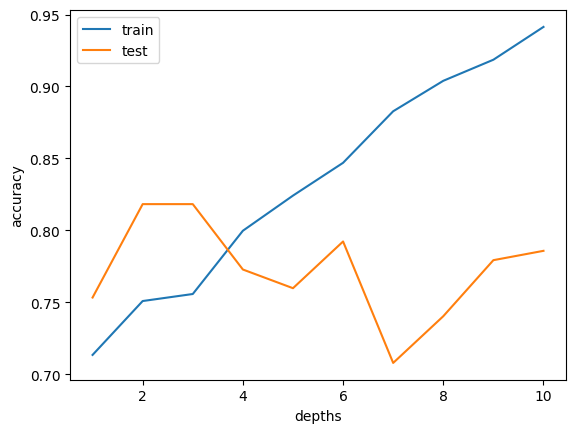

In [88]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_acc_dt = []
test_acc_dt = []
depths = range(1, 11)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0, min_samples_split=4, min_samples_leaf=2).fit(X_train, y_train)
    train_acc_dt.append(dt.score(X_train, y_train))
    test_acc_dt.append(dt.score(X_test, y_test))
    
plt.plot(depths, train_acc_dt, label='train')
plt.plot(depths, test_acc_dt, label='test')
plt.xlabel('depths')
plt.ylabel('accuracy')
plt.legend()




In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

accuracy_score(y_train, y_pred_train_dt), accuracy_score(y_test, y_pred_test_dt)



(0.755700325732899, 0.8181818181818182)

In [90]:
confusion_matrix(y_train, y_pred_train_dt), confusion_matrix(y_test, y_pred_test_dt)

(array([[330,  56],
        [ 94, 134]]),
 array([[98, 16],
        [12, 28]]))

In [91]:
recall_score(y_train, y_pred_train_dt), recall_score(y_test, y_pred_test_dt)

(0.5877192982456141, 0.7)

In [92]:
precision_score(y_train, y_pred_train_dt), precision_score(y_train, y_pred_train_dt)

(0.7052631578947368, 0.7052631578947368)

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30).fit(X_train, y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

accuracy_score(y_train, y_pred_train_rf), accuracy_score(y_test, y_pred_test_rf)

(0.993485342019544, 0.8181818181818182)

In [99]:
confusion_matrix(y_train, y_pred_train_rf), confusion_matrix(y_test, y_pred_test_rf)

(array([[386,   0],
        [  4, 224]]),
 array([[100,  14],
        [ 14,  26]]))

In [100]:
recall_score(y_train, y_pred_train_rf), recall_score(y_test, y_pred_test_rf)

(0.9824561403508771, 0.65)

In [101]:
precision_score(y_train, y_pred_train_rf), precision_score(y_train, y_pred_train_rf)

(1.0, 1.0)